# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.189036e+01     1.574771e+01
 * time: 0.005110979080200195
     1     5.865404e+01     9.903434e+00
 * time: 0.014603137969970703
     2     5.517094e+01     1.143650e+01
 * time: 0.03699302673339844
     3     3.793637e+01     9.291832e+00
 * time: 0.17120718955993652
     4     2.812409e+01     8.034149e+00
 * time: 0.20130705833435059
     5     1.997016e+01     5.857314e+00
 * time: 0.22631216049194336
     6     1.559882e+01     4.991183e+00
 * time: 0.2473130226135254
     7     1.244429e+01     3.910429e+00
 * time: 0.26545119285583496
     8     1.142876e+01     3.067463e+00
 * time: 0.2870650291442871
     9     1.065711e+01     5.859790e+00
 * time: 0.30385899543762207
    10     9.071241e+00     4.006935e+00
 * time: 0.3262360095977783
    11     8.506757e+00     3.948027e+00
 * time: 0.3438401222229004
    12     7.761503e+00     3.958245e+00
 * time: 0.4209291934967041
    13     6.991305e+00     2.738203e+00
 * time: 0.

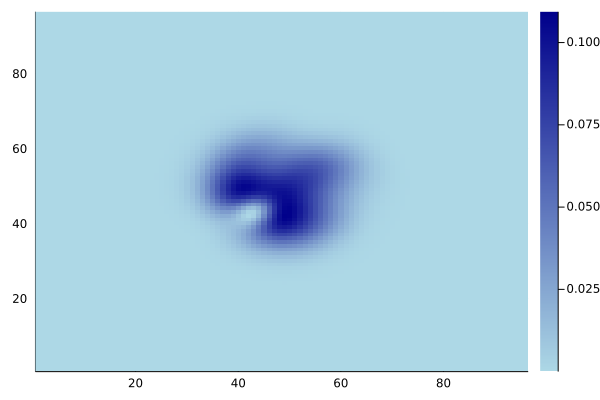

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))